# Plots

Plotting code for regular use. Stored here for quick access and reference.

It has been taken from the excellent notes by Nicolas Rougier found on https://github.com/rougier/matplotlib-tutorial and https://github.com/rougier/ten-rules [1], I made a few modifications and commented some of the code.

[1] http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833

# Index

#### [Annotated plot](#annotated)
#### [Subplots](#subplots)
#### [Subplots with Gridspec](#gridspec)
#### [Nice visualization of time series](#visualization)
#### [Zoom in](#zoom)

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

<a id='annotated'></a>
## Annotated plot

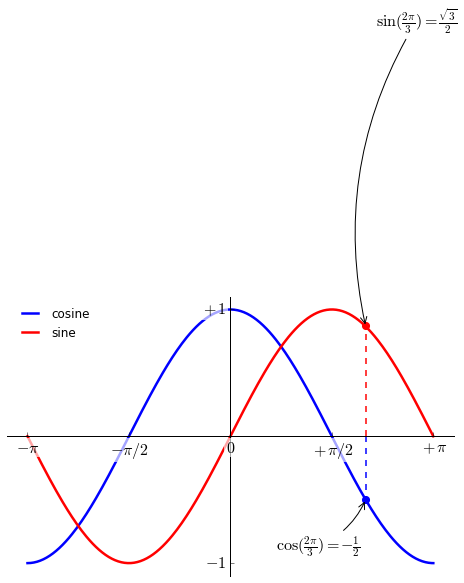

In [36]:
# From https://github.com/rougier/matplotlib-tutorial

# Size figure
plt.figure(figsize=(8,5), dpi=80)

# Grid of 1x1
ax = plt.subplot(111)

# Delete spines on the right and on top
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Move the spines at the bottom (y axis) and the left (x axis) to 0,0
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

# Where to put the ticks labels
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Data
X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C,S = np.cos(X), np.sin(X)

# Linestyle solid
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-",  label="sine")

# Define limits
plt.xlim(X.min()*1.1, X.max()*1.1)
plt.ylim(C.min()*1.1,C.max()*1.1)

# Where to put the ticks
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([-1, +1],
           [r'$-1$', r'$+1$'])

# Legend
plt.legend(loc='upper left', frameon=False)

# Define a point to annotate
t = 2*np.pi/3

# Draw vertical -- line t,0 to t,cos(t) (or t,0 to t,sin(t)) 
plt.plot([t,t],[0,np.cos(t)],
         color ='blue',  linewidth=1.5, linestyle="--")
plt.plot([t,t],[0,np.sin(t)],
         color ='red',  linewidth=1.5, linestyle="--")

# Draw a red/blue point where the lines intersect
plt.scatter([t,],[np.cos(t),], 50, color ='blue')
plt.scatter([t,],[np.sin(t),], 50, color ='red')

# Annotate formulas 
# To define for which point xy = (t, sin(t))
# To define where the annotated formula will be relative to the dot above "xytext"
# arrowprops dictionary to define the arrowstyle and the curvature (connectionstyle), the closer to 0 the more a straight arrow
# it will be
plt.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)),  xycoords='data',
             xytext=(+10, +300), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)),  xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

# Bboxes
# Grab each label and set fontsize and a bbox so we can see them more clearly
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65 ))

#plt.savefig("../figures/exercice_10.png",dpi=72)
plt.show()


<a id='subplots'></a>
## Subplots

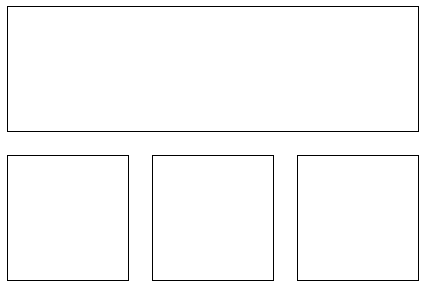

In [65]:
fig = plt.figure()
fig.subplots_adjust(bottom=0.025, left=0.025, top = 0.975, right=0.975)

# (2, 1, 1) 
# 2 Defines that there are 2 rows
# 1 Definese that there is on row
# 1 Figure number
plt.subplot(2,1,1)
plt.xticks([]), plt.yticks([])

# 2 rows, 3 columns
plt.subplot(2,3,4)
plt.xticks([]), plt.yticks([])

plt.subplot(2,3,5)
plt.xticks([]), plt.yticks([])

plt.subplot(2,3,6)
plt.xticks([]), plt.yticks([])

# plt.savefig('../figures/multiplot_ex.png',dpi=48)
plt.show()

<a id='gridspec'></a>
## Subplots with Gridspec

In [ ]:
import matplotlib.gridspec as gridspec

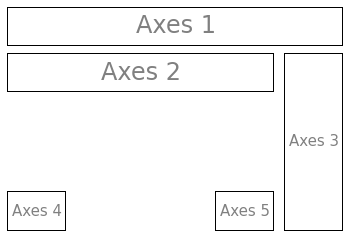

In [48]:
# From https://github.com/rougier/matplotlib-tutorial

# Define a grid
G = gridspec.GridSpec(5, 5)

# Axes 1 is on row 0 and uses all columns
axes_1 = subplot(G[0, :])
# Remove ticks
xticks([]), yticks([])
# Draw text in the middle of the axes (0.5,0.5) 
text(0.5,0.5, 'Axes 1',ha='center',va='center',size=24,alpha=.5)

# Axes 2 is on row 1 and extends from 0 up to the last column
axes_2 = subplot(G[1, :-1])
xticks([]), yticks([])
text(0.5,0.5, 'Axes 2',ha='center',va='center',size=24,alpha=.5)

# Axes 3 is on row 1 and the last column
axes_3 = subplot(G[1:, -1])
xticks([]), yticks([])
text(0.5,0.5, 'Axes 3',ha='center',va='center',size=15,alpha=.5)

# Axes 4 is on the last row -1 and column 0
axes_4 = subplot(G[-1,0])
xticks([]), yticks([])
text(0.5,0.5, 'Axes 4',ha='center',va='center',size=15,alpha=.5)

# Axes 4 is on the last row -1 and column -2
axes_5 = subplot(G[-1,-2])
xticks([]), yticks([])
text(0.5,0.5, 'Axes 5',ha='center',va='center',size=15,alpha=.5)

#plt.savefig('../figures/gridspec.png', dpi=64)
show()

<a id='visualization'></a>
## Nice visualization of plot series, highlighting them one at a time

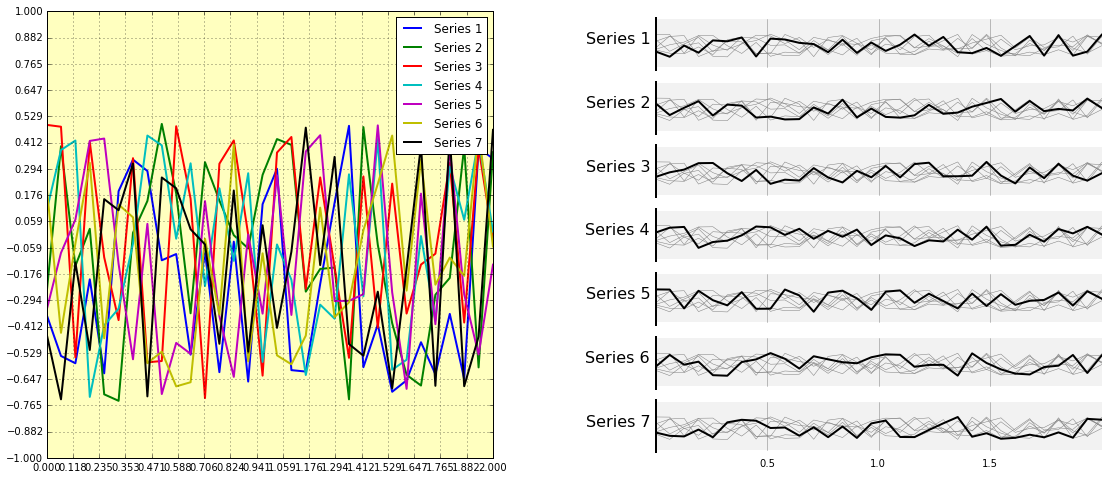

In [66]:
# From https://github.com/rougier/ten-rules 

# Data
p, n = 7, 32
X = np.linspace(0,2,n)
Y = np.random.uniform(-.75,.5,(p,n))

fig = plt.figure(figsize=(20,8))

# First subplot
ax = plt.subplot(1,2,1, aspect=1)
ax.patch.set_facecolor((1,1,.75))
for i in range(p):
    plt.plot(X, Y[i], label = "Series %d     " % (1+i), lw=2)
plt.xlim( 0,2)
plt.ylim(-1,1)
plt.yticks(np.linspace(-1,1,18))
plt.xticks(np.linspace(0,2,18))
plt.legend()
plt.grid()

# Second subplot
ax = plt.subplot(1,2,2, aspect=1)
Yy = p-(np.arange(p)+0.5)
Xx = [p,]*p
rects = plt.barh(Yy, Xx, align='center', height=0.75, color='.95', ec='None', zorder=-20)
plt.xlim(0,p), plt.ylim(0,p)

for i in range(p):
    label = "Series %d" % (1+i)
    plt.text(-.1, Yy[i], label, ha = "right", fontsize=16)
    plt.axvline(0,   (Yy[i]-.4)/p, (Yy[i]+.4)/p, c='k', lw=3)
    plt.axvline(.25*p, (Yy[i]-.375)/p, (Yy[i]+.375)/p, c='.5', lw=.5, zorder=-15)
    plt.axvline(.50*p, (Yy[i]-.375)/p, (Yy[i]+.375)/p, c='.5', lw=.5, zorder=-15)
    plt.axvline(.75*p, (Yy[i]-.375)/p, (Yy[i]+.375)/p, c='.5', lw=.5, zorder=-15)
    plt.plot(X*p/2, i+.5+2*Y[i]/p, c='k', lw=2)
    for j in range(p):
        if i != j:
            plt.plot(X*p/2, i+.5+2*Y[j]/p, c='.5', lw=.5, zorder=-10)
            
plt.text(.25*p, 0, "0.5", va = "top", ha="center", fontsize=10)
plt.text(.50*p, 0, "1.0", va = "top", ha="center", fontsize=10)
plt.text(.75*p, 0, "1.5", va = "top", ha="center", fontsize=10)
plt.axis('off')

# plt.savefig("figure-7.pdf")
plt.show()

<a id='zoom'></a>
## Zooming in part of the plot

In [67]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

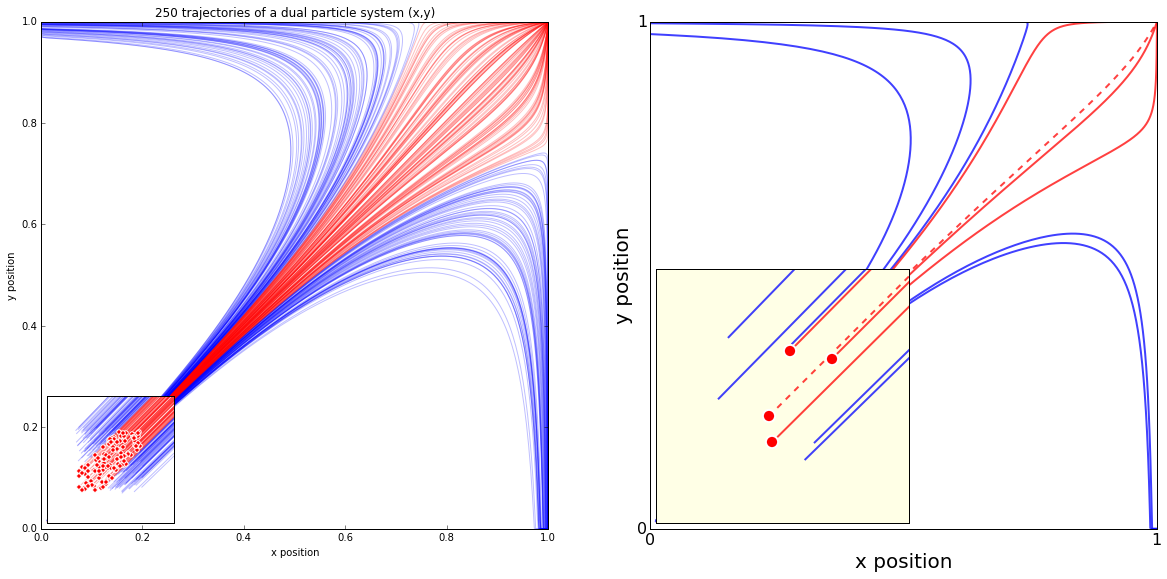

In [68]:
# From https://github.com/rougier/ten-rules 

def simulate():
    d = 0.005
    x = np.random.uniform(0,d)
    y = d-x
    x,y = np.random.uniform(0,d,2)

    dt = 0.05
    t = 35.0
    alpha = 0.25
    n = int(t/dt)
    X = np.zeros(n)
    Y = np.zeros(n)
    C = np.random.randint(0,2,n)

    for i in xrange(n):
        # Asynchronous
        if 0:
            if C[i]:
                x += (alpha + (x-y)) * (1-x) * dt
                x = max(x,0.0)
                y += (alpha + (y-x)) * (1-y) * dt
                y = max(y,0.0)
            else:
                y += (alpha + (y-x)) * (1-y) * dt
                y = max(y,0.0)
                x += (alpha + (x-y)) * (1-x) * dt
                x = max(x,0.0)
        # Synchronous
        else:
            dx = (alpha + (x-y)) * (1-x) * dt
            dy = (alpha + (y-x)) * (1-y) * dt
            x = max(x+dx, 0.0)
            y = max(y+dy, 0.0)
        X[i] = x
        Y[i] = y
    return X,Y





np.random.seed(11)
S = []
n = 250
for i in range(n):
    S.append(simulate())


plt.figure(figsize=(20,10))
ax = plt.subplot(121, aspect=1)
axins = zoomed_inset_axes(ax, 25, loc=3)
for i in range(n):
    X,Y = S[i]
    if X[-1] > 0.9 and Y[-1] > 0.9:
        c = "r"
        lw = 1.0
        axins.scatter( X[0],Y[0], c='r', edgecolor='w', zorder=10)
    else:
        c = "b"
        lw = 1.0
    ax.plot(X,Y, c=c, alpha=.25, lw=lw)
    axins.plot(X,Y, c=c, alpha=.25, lw=lw)

ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xlabel('x position')
ax.set_ylabel('y position')
ax.set_title('%d trajectories of a dual particle system (x,y)' % n)
axins.set_xlim(0.01, 0.02)
axins.set_xticks([])
axins.set_ylim(0.01, 0.02)
axins.set_yticks([])

ax = plt.subplot(122, aspect=1)
axins = zoomed_inset_axes(ax, 50, loc=3)
axins.set_axis_bgcolor((1,1,.9))
n = 9
for i in range(n):
    X,Y = S[i]
    ls = '-'
    if i==2:
        ls='--'
    if X[-1] > 0.9 and Y[-1] > 0.9:
        c = "r"
        lw = 2.0
        axins.scatter( X[0],Y[0], s=150, c='r', edgecolor='w', zorder=10,lw=2)
    else:
        c = "b"
        lw = 2.0
    ax.plot(X,Y, c=c, alpha=.75, lw=lw, ls=ls)
    axins.plot(X,Y, c=c, alpha=.75, lw=lw, ls=ls)

ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(["0", "1"], fontsize=16)
ax.set_yticklabels(["0", "1"], fontsize=16)
ax.set_xlabel('x position',fontsize=20)
ax.set_ylabel('y position',fontsize=20)
#ax.set_title('%d trajectories of a dual particle system (x,y)' % n)
axins.set_xlim(0.01, 0.02)
axins.set_xticks([])
axins.set_ylim(0.01, 0.02)
axins.set_yticks([])

#plt.savefig('figure-3.pdf')
plt.show()